In [1]:
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1.Data Cleaning

In [2]:
import numpy as np

In [3]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('spamcsv.csv')

In [6]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5302,ham,About &lt;#&gt; bucks. The banks fees are fix...,NaN,NaN,NaN
1584,ham,"Sorry, I'll call later",NaN,NaN,NaN
3542,ham,I'm e person who's doing e sms survey...,NaN,NaN,NaN
843,spam,Urgent! call 09066350750 from your landline. Y...,NaN,NaN,NaN
4113,ham,Where are you ? What do you do ? How can you s...,NaN,NaN,NaN
4197,spam,Want to funk up ur fone with a weekly new tone...,NaN,NaN,NaN
2775,ham,We confirm eating at esplanade?,NaN,NaN,NaN
2068,ham,Its hard to believe things like this. All can ...,NaN,NaN,NaN
3867,ham,"not that I know of, most people up here are st...",NaN,NaN,NaN
1731,ham,Lol. Well quality aint bad at all so i aint co...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

1.data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
## drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(10)

,v1,v2
1061,ham,I might come to kerala for 2 days.so you can b...
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...
2967,ham,"Mostly sports type..lyk footbl,crckt.."
5086,ham,Omg if its not one thing its another. My cat h...
245,ham,Too late. I said i have the website. I didn't ...
2041,ham,ÌÏ dun wan to watch infernal affair?
10,ham,I'm gonna be home soon and i don't want to tal...
915,ham,I could ask carlos if we could get more if any...
1744,spam,Someone has conacted our dating service and en...
4496,ham,Ok


In [10]:
#rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(10)

,target,text
5560,ham,Anything lor. Juz both of us lor.
3341,ham,You will go to walmart. I.ll stay.
2834,ham,"Ya they are well and fine., BBD(pooja) full pi..."
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
2154,ham,Oh god i am happy to see your message after 3 ...
1767,ham,"K, want us to come by now?"
3179,ham,There the size of elephant tablets & u shove u...
4932,ham,Once free call me sir.
771,ham,Lol! U drunkard! Just doing my hair at d momen...
597,spam,You have an important customer service announc...


In [11]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
#tranformed ham for 0 and spam msg for 1
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

#duplicate values
df.duplicated().sum()

In [16]:
 #remove duplicate
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

2.EDA (Exploratary data anyalysis)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


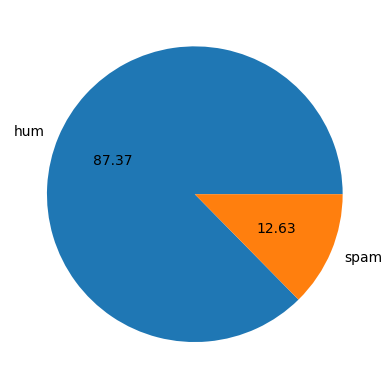

In [22]:
#pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['hum','spam'],autopct="%0.2f")
plt.show()

In [23]:
#data is imbalnced
import nltk



In [24]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import nltk


In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sumiti08\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
#counting the no of characters from text columns
df['num_character'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# counting num of words by applying lambda functon on text column 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()


,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#describtion of columns for ham msg
df[df['target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#describtion of columns for spam msg
df[df['target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

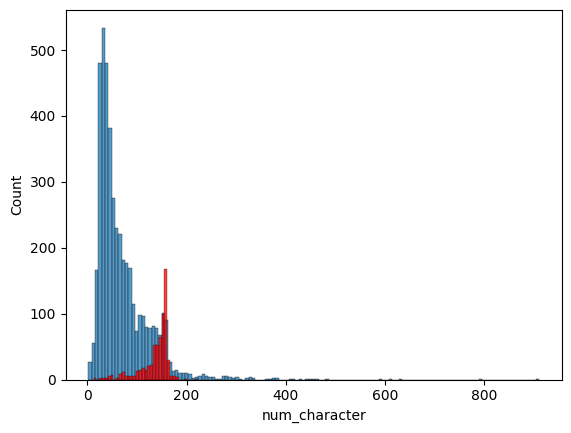

In [38]:
#histogram of no characters from ham and spam msg
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

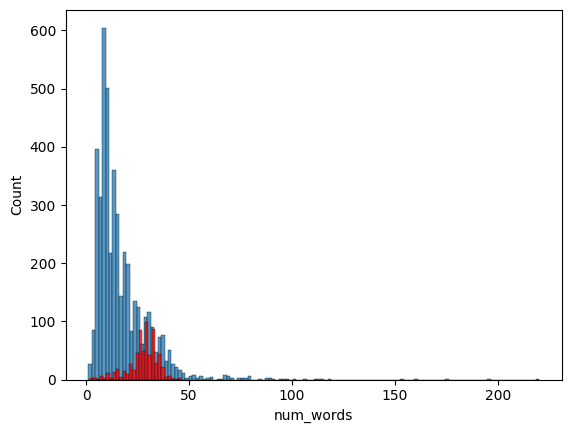

In [39]:
#histogram of no words from ham and spam msg
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

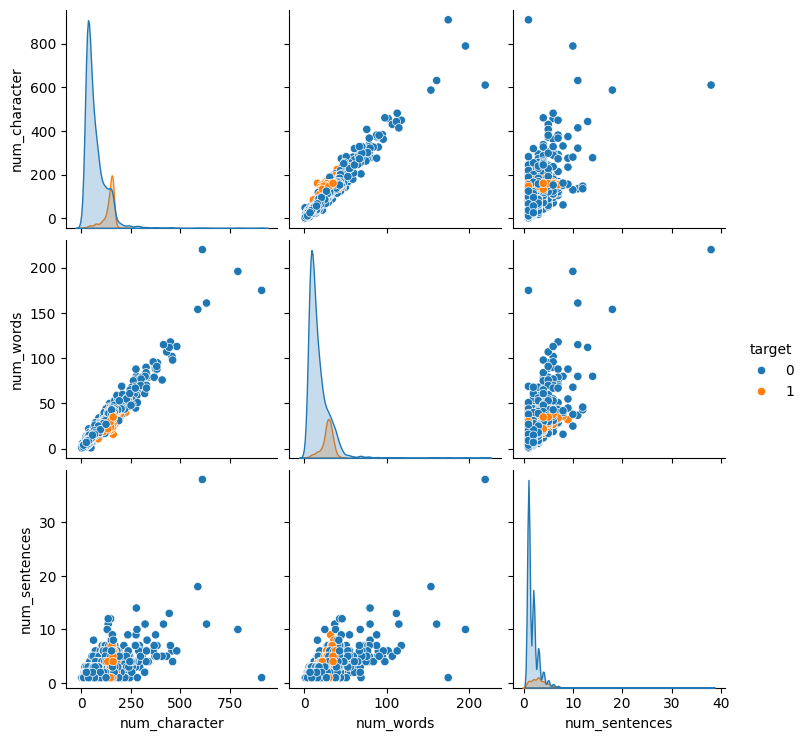

In [40]:
sns.pairplot(df,hue='target')

In [41]:
#cooreltion between all columns
df.corr(numeric_only=True)

,target,num_character,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

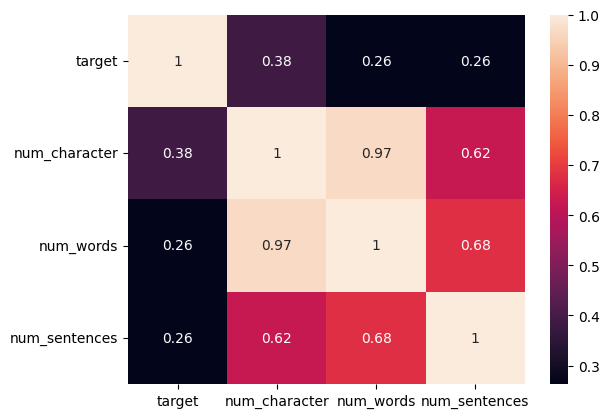

In [42]:
#heatmap from cooreltion
sns.heatmap(df.corr(numeric_only=True),annot=True)

3.data preprocessing
lower case
tokenization
removing special characters
removing stop word and punctuations
stemming


In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumiti08\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [46]:
import string

In [47]:
#funtion to lower case data,remove stop words and punctuation,and stem it
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[ : ]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return "  ".join(y)

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [49]:
transform_text('did you Like ? my presentation')

'like  present'

In [50]:
transform_text('hey sumiti where u have been ?')

'hey  sumiti  u'

In [51]:
transform_text('I Loved Lectures on Machine Learning. How about you?')

'love  lectur  machin  learn'

In [52]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [53]:
transform_text('Im gonna be home soon and i dont want to talk about this stuff anymore tonight, k? Ive cried enough today.')

'im  gon  na  home  soon  dont  want  talk  stuff  anymor  tonight  k  ive  cri  enough  today'

In [54]:
df['transformed_text'] = df['text'].apply(transform_text)

In [55]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:
#wordclound of spam msg
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

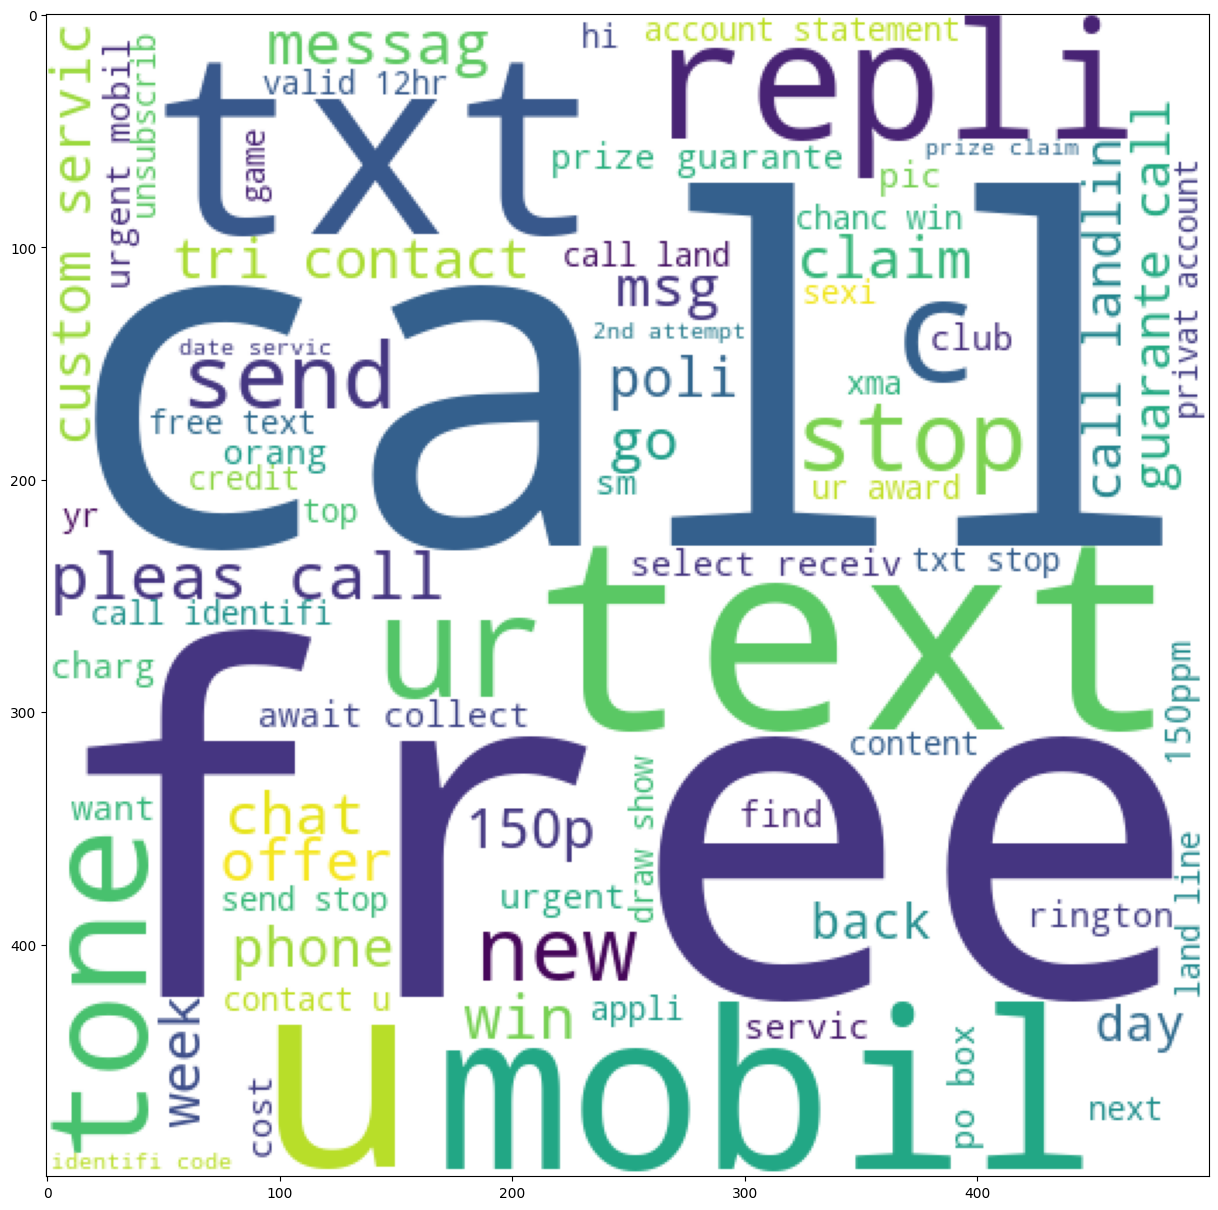

In [59]:
plt.figure(figsize=(15,60))
plt.imshow(spam_wc)

In [60]:
#wordcloud of ham msg
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

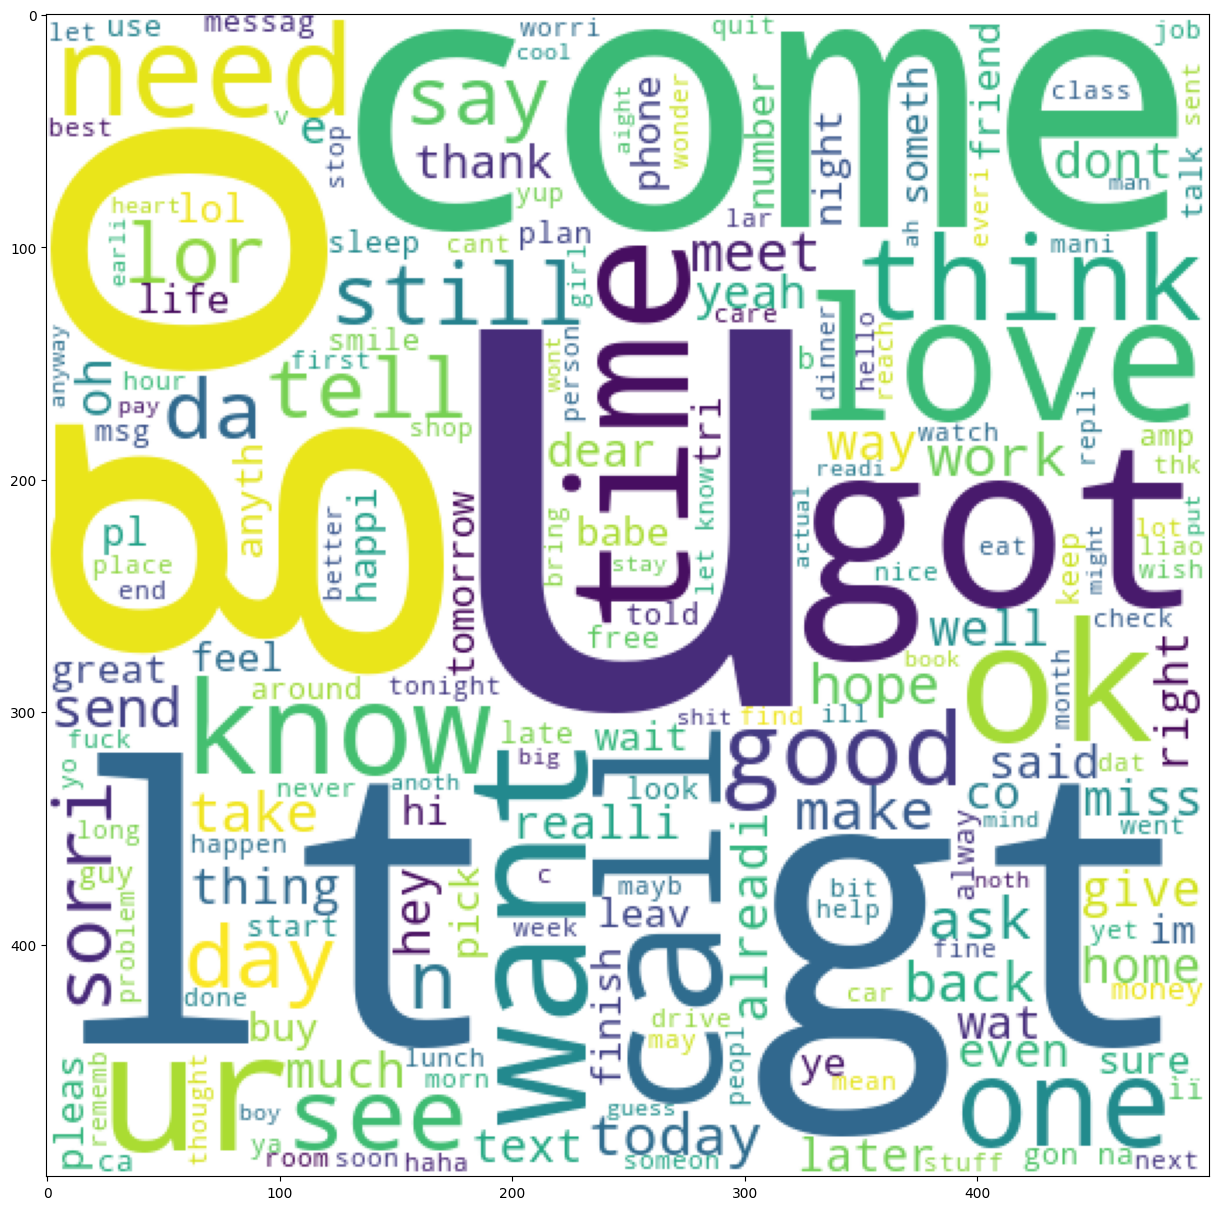

In [61]:
plt.figure(figsize=(15,60))
plt.imshow(ham_wc)

In [62]:
# to find the repeted words from spam msg
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

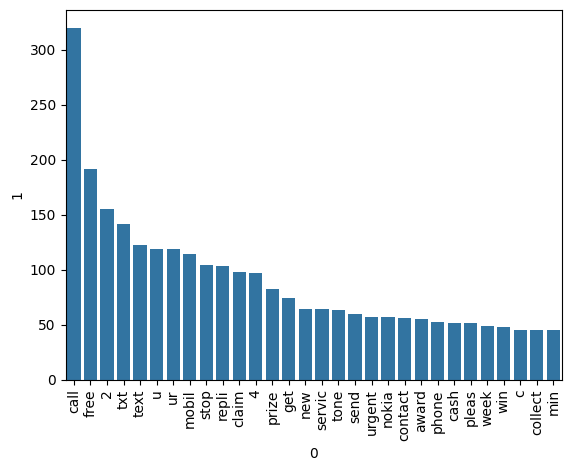

In [64]:
# to find most repeated word from spam msg
from collections import Counter
data = (pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()
             

In [65]:
# to find the repeted words from ham msg
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

35404

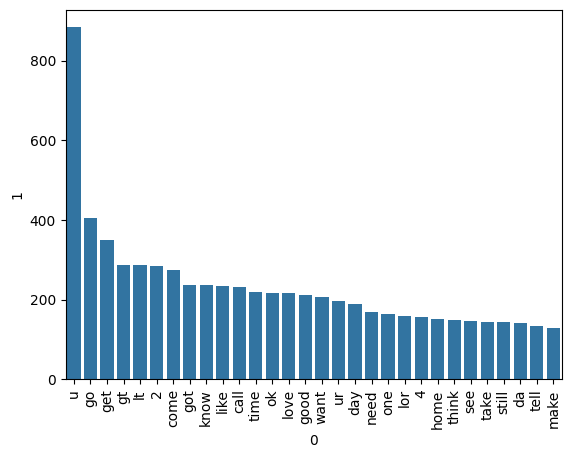

In [67]:
# to find most repeated word from ham msg
from collections import Counter
data = (pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()

4.model building

In [68]:
#text vectorization
#using bag of words


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [70]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [71]:
x.shape

(5169, 6708)

In [72]:
y = df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [79]:
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [80]:
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [81]:
#using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [82]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
X.shape

(5169, 3000)

In [84]:
y = df['target'].values


In [85]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [89]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [90]:
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [91]:
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [92]:
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [93]:
# we are choosing tfidf--> mnb as its not giving any false positive values and have high precision score

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
# creating objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='11',max_iter=1000)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [96]:
#function to calculate acurracy and precision of training data
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    
    return accuracy,precision

In [97]:
#creating dictionary of algoritham name and their objects
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XgB' : xgb,
}



In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [100]:
# `train_classifier` is defined as a function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # returns accuracy and precision
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy, precision

#initializing classifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',max_iter=1000)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

#creating dictionary of algoritham name and their objects
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XgB' : xgb,
}

# using it in the loop
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For MNB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9516441005802708
Precision - 0.8188405797101449
For LR
Accuracy - 0.9545454545454546
Precision - 0.9789473684210527
For RF
Accuracy - 0.9738878143133463
Precision - 0.9826086956521739
For AdaBoost
Accuracy - 0.9216634429400387
Precision - 0.8202247191011236
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For XgB
Accuracy - 0.9680851063829787
Precision - 0.9487179487179487


In [101]:
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [102]:
print(performance_df)

   Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2        MNB  0.970986   1.000000
5         RF  0.973888   0.982609
4         LR  0.954545   0.978947
0        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
10       XgB  0.968085   0.948718
9       GBDT  0.950677   0.930693
7        BgC  0.958414   0.868217
6   AdaBoost  0.921663   0.820225
3         DT  0.951644   0.818841


In [103]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [104]:
print(performance_df1)

   Algorithm   variable     value
0         KN   Accuracy  0.905222
1        MNB   Accuracy  0.970986
2         RF   Accuracy  0.973888
3         LR   Accuracy  0.954545
4        SVC   Accuracy  0.975822
5        ETC   Accuracy  0.974855
6        XgB   Accuracy  0.968085
7       GBDT   Accuracy  0.950677
8        BgC   Accuracy  0.958414
9   AdaBoost   Accuracy  0.921663
10        DT   Accuracy  0.951644
11        KN  Precision  1.000000
12       MNB  Precision  1.000000
13        RF  Precision  0.982609
14        LR  Precision  0.978947
15       SVC  Precision  0.974790
16       ETC  Precision  0.974576
17       XgB  Precision  0.948718
18      GBDT  Precision  0.930693
19       BgC  Precision  0.868217
20  AdaBoost  Precision  0.820225
21        DT  Precision  0.818841


<function matplotlib.pyplot.show(close=None, block=None)>

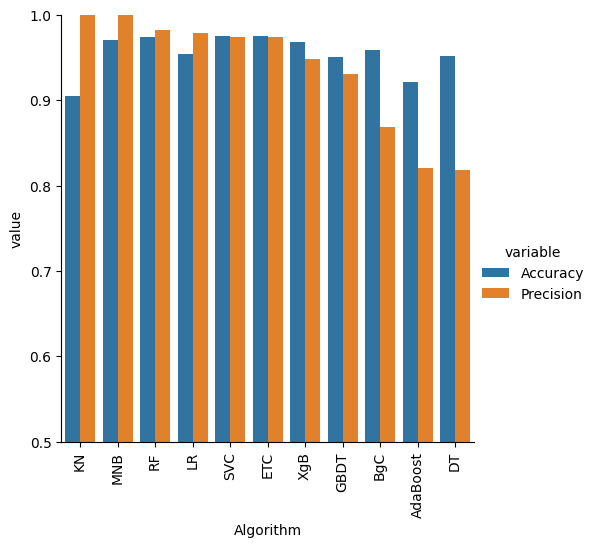

In [105]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind ='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show

In [106]:
#model improve
#choose the max features parameter of tfidf

In [107]:
temp_df = pd.DataFrame({'Algorithm': list(clfs.keys()),'Accuracy_max_fit_3000': accuracy_scores,'Precision_max_fit_3000': precision_scores}).sort_values('Precision_max_fit_3000', ascending=False)


In [108]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_fit_3000,Precision_max_fit_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,MNB,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,LR,0.954545,0.978947,0.954545,0.978947
4,SVC,0.975822,0.974790,0.975822,0.974790
5,ETC,0.974855,0.974576,0.974855,0.974576
6,XgB,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.921663,0.820225,0.921663,0.820225


In [109]:
# #using minmax scaler to see whether the accuracy and precision score are comperatively high or not
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [110]:
X.shape

(5169, 3000)

In [111]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [112]:
y = df['target'].values

In [113]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [116]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [117]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [118]:
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [119]:
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [120]:
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

# `train_classifier` is defined as a function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # returns accuracy and precision
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy, precision

#initializing classifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',max_iter=1000)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

#creating dictionary of algoritham name and their objects
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XgB' : xgb,
}

# using it in the loop
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


For SVC
Accuracy - 0.9700193423597679
Precision - 0.9421487603305785
For KN
Accuracy - 0.9052224371373307
Precision - 0.9761904761904762
For MNB
Accuracy - 0.9787234042553191
Precision - 0.9461538461538461
For DT
Accuracy - 0.9516441005802708
Precision - 0.7972972972972973
For LR
Accuracy - 0.971953578336557
Precision - 0.9823008849557522
For RF
Accuracy - 0.9738878143133463
Precision - 0.9826086956521739
For AdaBoost
Accuracy - 0.9216634429400387
Precision - 0.8202247191011236
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For XgB
Accuracy - 0.9680851063829787
Precision - 0.9487179487179487


In [122]:
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [123]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.973888,0.982609
4,LR,0.971954,0.982301
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
10,XgB,0.968085,0.948718
2,MNB,0.978723,0.946154
0,SVC,0.970019,0.942149
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
6,AdaBoost,0.921663,0.820225


In [124]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [125]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.973888
1,LR,Accuracy,0.971954
2,KN,Accuracy,0.905222
3,ETC,Accuracy,0.974855
4,XgB,Accuracy,0.968085
5,MNB,Accuracy,0.978723
6,SVC,Accuracy,0.970019
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.921663


<function matplotlib.pyplot.show(close=None, block=None)>

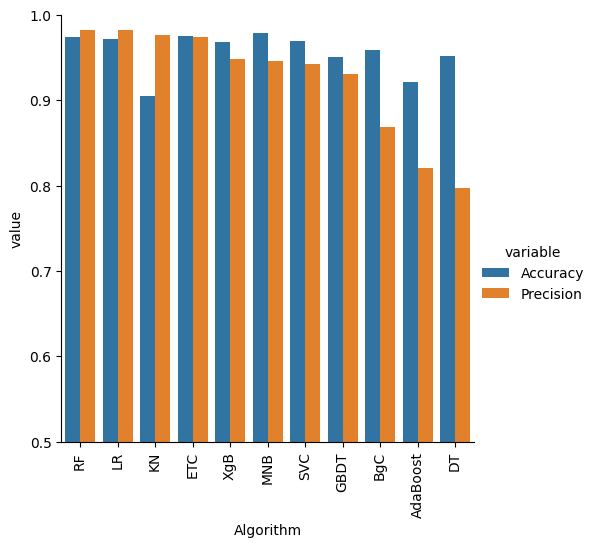

In [126]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind ='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show

In [127]:
temp_df = pd.DataFrame({'Algorithm': list(clfs.keys()),'Accuracy_max_fit_3000': accuracy_scores,'Precision_max_fit_3000': precision_scores}).sort_values('Precision_max_fit_3000', ascending=False)


In [128]:
new_df = performance_df.merge(temp_df,on = 'Algorithm')

In [129]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_fit_3000,Precision_max_fit_3000
0,RF,0.973888,0.982609,0.973888,0.982609
1,LR,0.971954,0.982301,0.971954,0.982301
2,KN,0.905222,0.976190,0.905222,0.976190
3,ETC,0.974855,0.974576,0.974855,0.974576
4,XgB,0.968085,0.948718,0.968085,0.948718
5,MNB,0.978723,0.946154,0.978723,0.946154
6,SVC,0.970019,0.942149,0.970019,0.942149
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.921663,0.820225,0.921663,0.820225


In [130]:
temp_df = pd.DataFrame({'Algorithm': list(clfs.keys()),'Accuracy_scaling': accuracy_scores,'Precision_scaling': precision_scores}).sort_values('Precision_scaling', ascending=False)

In [131]:
new_df_scaled = new_df.merge(temp_df,on = 'Algorithm')

In [132]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_fit_3000,Precision_max_fit_3000,Accuracy_scaling,Precision_scaling
0,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
1,LR,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301
2,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,XgB,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
5,MNB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
6,SVC,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225


In [133]:
# by using scaling we haven't got expected  results 
# we expected the accuracy should be atleast 97% and precision should be 100%
# but we still getting the low accuracy and precision 


In [134]:
#now we are combining the best performance model to see whether we get the expected output or not
# we are creating the voting classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)


In [135]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [136]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [137]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid', probability=True)),
                             ('nb',MultinomialNB()),
                             ('et',ExtraTreesClassifier(n_estimators= 50,random_state=2))],voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [138]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [139]:
#applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [140]:
from sklearn.ensemble import StackingClassifier

In [146]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [147]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [148]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))